## Task Title: Machine Learning Task

### Description

Project Domain / Category Data Science/Machine Learning Complete in 5 Days Abstract / Introduction Email has become a powerful tool for communication as it saves a lot of time and cost. It is one of the most popular and secure mediums for online transferring and communicating messages or data through the web. But, due to social networks, most of the emails contain unwanted information which is called spam. Identifying such spam emails is one of the important challenges. In this project, we will use the PYTHON text classification technique to identify or classify email spam messages. We will find accuracy, time, and error rate by applying suitable algorithms (such as NaiveBayes, NaiveBayesMultinomial, and J48, etc.) on Email Dataset and we will also compare which algorithm is best for text classification. *Functional Requirements: The administrator will perform all these tasks. 

1. Collect Data Set * Gathering the data for Email spam contains spam and non-spam messages 
2. Pre-processing * As most of the data in the real world are incomplete containing noisy and missing values. Therefore we have to apply Pre-processing to your data. 
3. Feature Selection * After the pre-processing step, we apply the feature selection algorithm, the algorithm which deploy here is the Best First Feature Selection algorithm. 
4. Apply Spam Filter Algorithms. * Handle Data: Load the dataset and split it into training and test datasets. * Summarize Data: summarize the properties in the training dataset so that we can calculate probabilities and make predictions. * Make a Prediction: Use the summaries of the dataset to generate a single prediction. * Make Predictions: Generate predictions given a test dataset and a summarized training dataset. * Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the percentage correct out of all predictions made. 
5. Train & Test Data * Split data into 70% training & 30% testing data sets. 6. Confusion Matrix * Create a confusion matrix table to describe the performance of a classification model. 7. Accuracy * Find the Accuracy of all algorithms and compare.

### 1. Collecting Data Set

this dataset is getting from this website: <a href='https://archive.ics.uci.edu/dataset/228/sms+spam+collection'> UC Irvine Machine Learning Repository <a> <br>

A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'messages'])
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


So here it is our dataset, First of all we do some data pre-processing where we deal with the NaN values and then convert label category into binary because it shows ham for not spam and spam for spamming. 

### 2. Pre-Processing

In [7]:
df.isna().sum()

label       0
messages    0
dtype: int64

So this dataset is cleaned there is no NaN value occur in whole dataset.

In [8]:
# convert label into binary
df['label'] = df.label.map({'ham':0, 'spam':1})

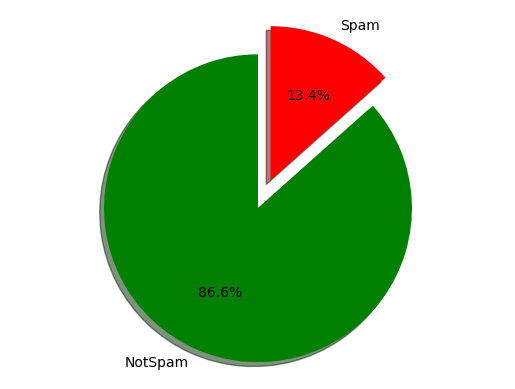

In [9]:
count_class = pd.value_counts(df.label, sort=True)

labels = 'NotSpam', 'Spam'
sizes = [count_class[0], count_class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# plotting
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

#### train-test split

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
X_train, X_test, y_train, y_test = tts(df['messages'], df['label'], test_size=0.3, random_state=1)

In [12]:
X_train.shape

(3900,)

In [13]:
y_train.shape

(3900,)

### 3. Feature Selection

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### 4. Model Training

#### 4.1 Naive Bayes

In [16]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [17]:
# 1. Gaussian Naive Bayes (for continuous features)
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# gnb_pred = gnb.predict(X_test)

# 2. Multinomial Naive Bayes (for discrete features, like word counts in text classification)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)

# Evaluate accuracy
# print("The accuracy of our Naïve Bayes Gaussian model is {} %".format(accuracy_score(y_test, gnb_pred) * 100))
# print("The Precision of our Naïve Bayes Gaussian model is {} %". format(precision_score(y_test, gnb_pred)* 100))
# print("The Recall of our Naïve Bayes Gaussian model is {} %" . format(recall_score(y_test, gnb_pred)* 100))

print('-'*100)

print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, mnb_pred) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, mnb_pred)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, mnb_pred)* 100))

----------------------------------------------------------------------------------------------------
The accuracy of our Naïve Bayes multinomial model is 98.74401913875597 %
The Precision of our Naïve Bayes multinomial model is 97.28506787330316 %
The Recall of our Naïve Bayes multinomial model is 93.47826086956522 %


**Confusion Matrix**

The accuracy of Naive Bayes Classifier is 98.74401913875597%

 [[1436    6]
 [  15  215]]


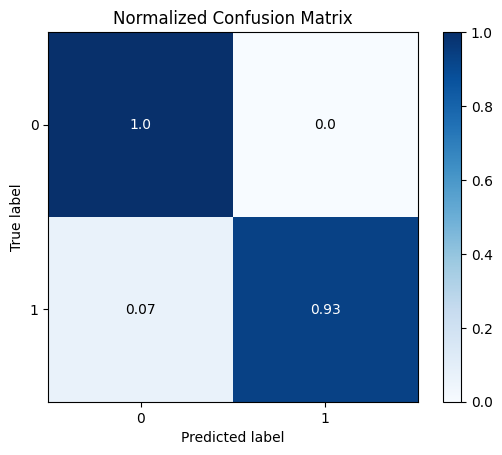

In [18]:
confusionmatrix = confusion_matrix(y_test, mnb_pred)
print("The accuracy of Naive Bayes Classifier is {}%".format(accuracy_score(y_test, mnb_pred)*100))
print('\n', confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, mnb_pred, normalize=True)
plt.show()

#### 4.2 J48 (C4.5 Decision Tree)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict on test data
clf_pred = clf.predict(X_test)


print('-'*100)

print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, clf_pred) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, clf_pred)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, clf_pred)* 100))

----------------------------------------------------------------------------------------------------
The accuracy of our Naïve Bayes multinomial model is 96.83014354066985 %
The Precision of our Naïve Bayes multinomial model is 90.04524886877829 %
The Recall of our Naïve Bayes multinomial model is 86.52173913043478 %


**Confusion Matrix**

The accuracy of Naive Bayes Classifier is 96.83014354066985%

 [[1420   22]
 [  31  199]]


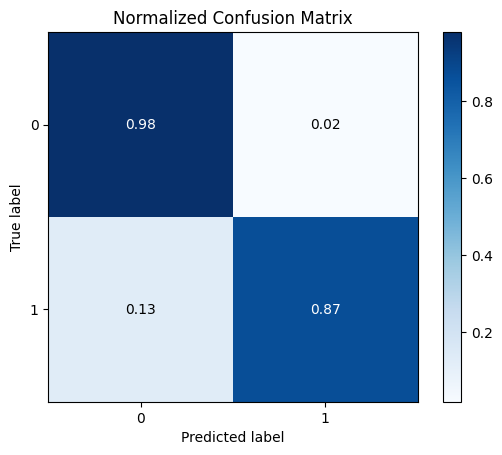

In [21]:
confusionmatrix = confusion_matrix(y_test, clf_pred)
print("The accuracy of Naive Bayes Classifier is {}%".format(accuracy_score(y_test, clf_pred)*100))
print('\n', confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, clf_pred, normalize=True)
plt.show()

In [22]:
import pickle

pickle.dump(mnb, open("email_spam.pkl", "wb"))
print("Model Dump Successfull")

Model Dump Successfull


In [23]:
import pickle

pickle.dump(cv, open("cv.pkl", "wb"))
print("Model Dump Successfull")

Model Dump Successfull


### Let's Check the Model

If the output is 0, it means that the input message is not spam, and if it is 1, it means that message has been spam.

In [25]:
new_test_sample_ham = ["Hi, I'm Ali Abdullah and I am glad to share the program that I've written with everyone."]

In [26]:
new_test_sample_spam= ["Congratulations, you've won a free Sony camera."]

In [27]:
new_test_sample_ham_vectorized = cv.transform(new_test_sample_ham)

In [28]:
new_test_sample_spam_vectorized = cv.transform(new_test_sample_spam)

In [29]:
sample_predict = mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0], dtype=int64)

In [30]:
sample_predict = mnb.predict(new_test_sample_spam_vectorized)
sample_predict

array([1], dtype=int64)

### fin.